# Combining dataframes and scraping Canadian weather data.ipynb

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

C:\Users\Administrator\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


## Summary
By the end of this chapter, we're going to have downloaded all of Canada's weather data for 2012, and saved it to a CSV.

We'll do this by downloading it one month at a time, and then combining all the months together.

Here's the temperature every hour for 2012!

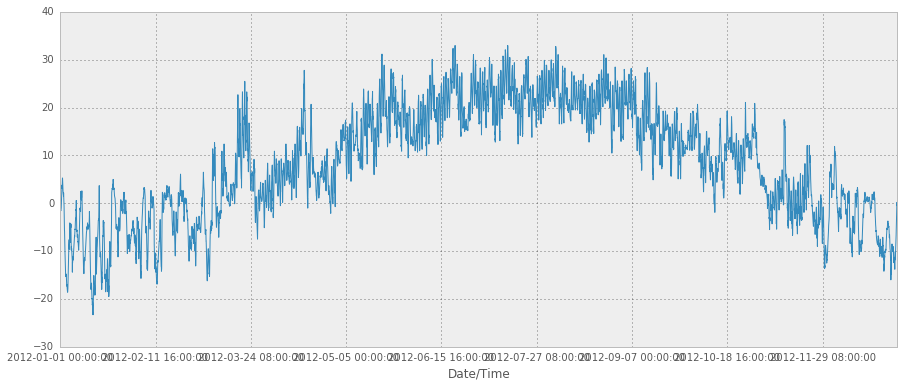

In [4]:
weather_2012_final = pd.read_csv('data/weather_2012.csv', index_col='Date/Time')
weather_2012_final['Temp (C)'].plot(figsize=(15, 6))

In [17]:
weather_2012_final[:5]


,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [28]:
#change the index into pandas DateTimeIndex.
weather_2012_final.index = pd.DatetimeIndex(weather_2012_final.index)

array([ 1,  1,  1, ..., 12, 12, 12])

## 5.1 Downloading one month of weather data
When playing with the cycling data, I wanted temperature and precipitation data to find out if people like biking when it's raining. So I went to the site for Canadian historical weather data, and figured out how to get it automatically.

Here we're going to get the data for March 2012, and clean it up

Here's an URL template you can use to get data in Montreal.

In [34]:
#get the data of march 2012
ismar = weather_2012_final.index.month == 3
weather_mar2012 = weather_2012_final[ismar]
weather_mar2012

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
2012-03-01 00:00:00,-5.5,-9.7,72,24,4.0,100.97,Snow
2012-03-01 01:00:00,-5.7,-8.7,79,26,2.4,100.87,Snow
2012-03-01 02:00:00,-5.4,-8.3,80,28,4.8,100.80,Snow
2012-03-01 03:00:00,-4.7,-7.7,79,28,4.0,100.69,Snow
2012-03-01 04:00:00,-5.4,-7.8,83,35,1.6,100.62,Snow
2012-03-01 05:00:00,-5.3,-7.9,82,33,2.4,100.58,Snow
2012-03-01 06:00:00,-5.2,-7.8,82,33,4.0,100.57,Snow
2012-03-01 07:00:00,-4.9,-7.4,83,30,1.6,100.59,Snow
2012-03-01 08:00:00,-5.0,-7.5,83,32,1.2,100.59,Snow
2012-03-01 09:00:00,-4.9,-7.5,82,32,1.6,100.60,Snow


plot the weather_mar2012 data

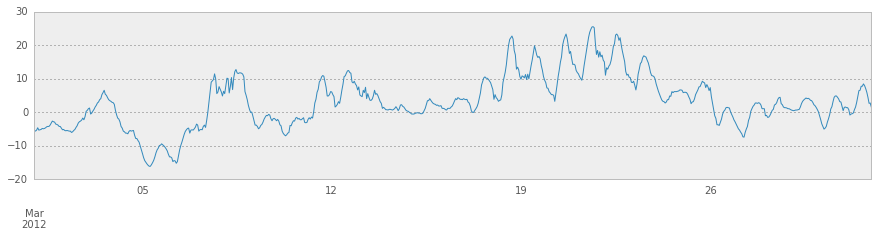

In [36]:
weather_mar2012['Temp (C)'].plot(kind='line')

Notice how it goes up to 25° C in the middle there? That was a big deal. It was March, and people were wearing shorts outside.

And I was out of town and I missed it. Still sad, humans.

I had to write '\xb0' for that degree character °. Let's fix up the columns. We're going to just print them out, copy, and fix them up by hand.

## 5.2 Plotting the temperature by hour of day

This one's just for fun -- we've already done this before, using groupby and aggregate! We will learn whether or not it gets colder at night. Well, obviously. But let's do it anyway.

<bound method NDFrame.head of                      Temp (C)
2012-03-01 00:00:00      -5.5
2012-03-01 01:00:00      -5.7
2012-03-01 02:00:00      -5.4
2012-03-01 03:00:00      -4.7
2012-03-01 04:00:00      -5.4
2012-03-01 05:00:00      -5.3
2012-03-01 06:00:00      -5.2
2012-03-01 07:00:00      -4.9
2012-03-01 08:00:00      -5.0
2012-03-01 09:00:00      -4.9
2012-03-01 10:00:00      -4.7
2012-03-01 11:00:00      -4.4
2012-03-01 12:00:00      -4.3
2012-03-01 13:00:00      -4.3
2012-03-01 14:00:00      -3.9
2012-03-01 15:00:00      -3.3
2012-03-01 16:00:00      -2.7
2012-03-01 17:00:00      -2.9
2012-03-01 18:00:00      -3.0
2012-03-01 19:00:00      -3.6
2012-03-01 20:00:00      -3.7
2012-03-01 21:00:00      -3.9
2012-03-01 22:00:00      -4.3
2012-03-01 23:00:00      -4.3
2012-03-02 00:00:00      -4.8
2012-03-02 01:00:00      -5.3
2012-03-02 02:00:00      -5.2
2012-03-02 03:00:00      -5.5
2012-03-02 04:00:00      -5.6
2012-03-02 05:00:00      -5.5
...                       ...
2012-03-30

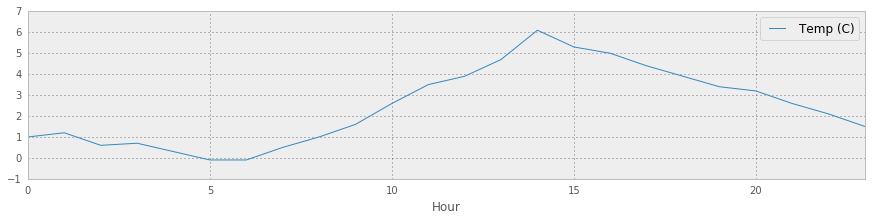

In [37]:
temperatures = weather_mar2012[[u'Temp (C)']].copy()
print(temperatures.head)
temperatures.loc[:,'Hour'] = weather_mar2012.index.hour
temperatures.groupby('Hour').aggregate(np.median).plot()

So it looks like the time with the highest median temperature is 2pm. Neat.